In [78]:
import torch
import pandas as pd
from sklearn import preprocessing
import numpy as np
import os

SPLIT = 0.8

path = os.path.join("..","data","./data.xlsx")
df = pd.read_excel(path)

df = df.dropna() # drop nan entry
# df[pd.isnull(df).any(axis=1)]

In [79]:
le = preprocessing.LabelEncoder()
le.fit(df['catName'].unique())
num_classes = len(le.classes_)
class_list = list(le.classes_)

print(class_list)

print("number of classes:",num_classes)
df.loc[:,'catName'] = le.transform(df.loc[:,'catName'])
data = df[['question','catName']]

total = 0
stat = [0 for i in range(num_classes)]
for index,tmp in data.iterrows():
    stat[tmp['catName']] += 1
    total += 1
print(stat)
print("Total data: {}".format(total))

['Does the program support certain features?', 'Download/installation issues with Application Manager.', 'Error message pops up when I perform some action.', 'How to activate/register my product?', 'How to capture?', 'How to create disc?', 'How to edit?', 'How to produce file?', 'How to set preferences/settings?', 'How to share/upload video?', 'How to use certain effects/features?', 'I am having problems using CyberLink Cloud via my CyberLink software.', 'I am having trouble signing in to my CyberLink software.', 'I have a suggestion.', 'I have activation/registration problem.', 'I have component activation problem', 'I have install/uninstall/upgrade/patch problems.', 'I have other product feature question.', 'I have other questions.', 'I have other questions/issues.', 'I have other trouble(s).', 'I have problem creating disc.', 'I have problem launching the program.', 'I have problem producing file.', 'I have problem sharing/uploading video.', 'I have problem using certain features/ef

In [94]:
import numpy as np
stat = np.array(stat)

ordered_index = stat.argsort()
stat = [stat[i] / total for i in ordered_index]
class_list = [class_list[i] for i in ordered_index]

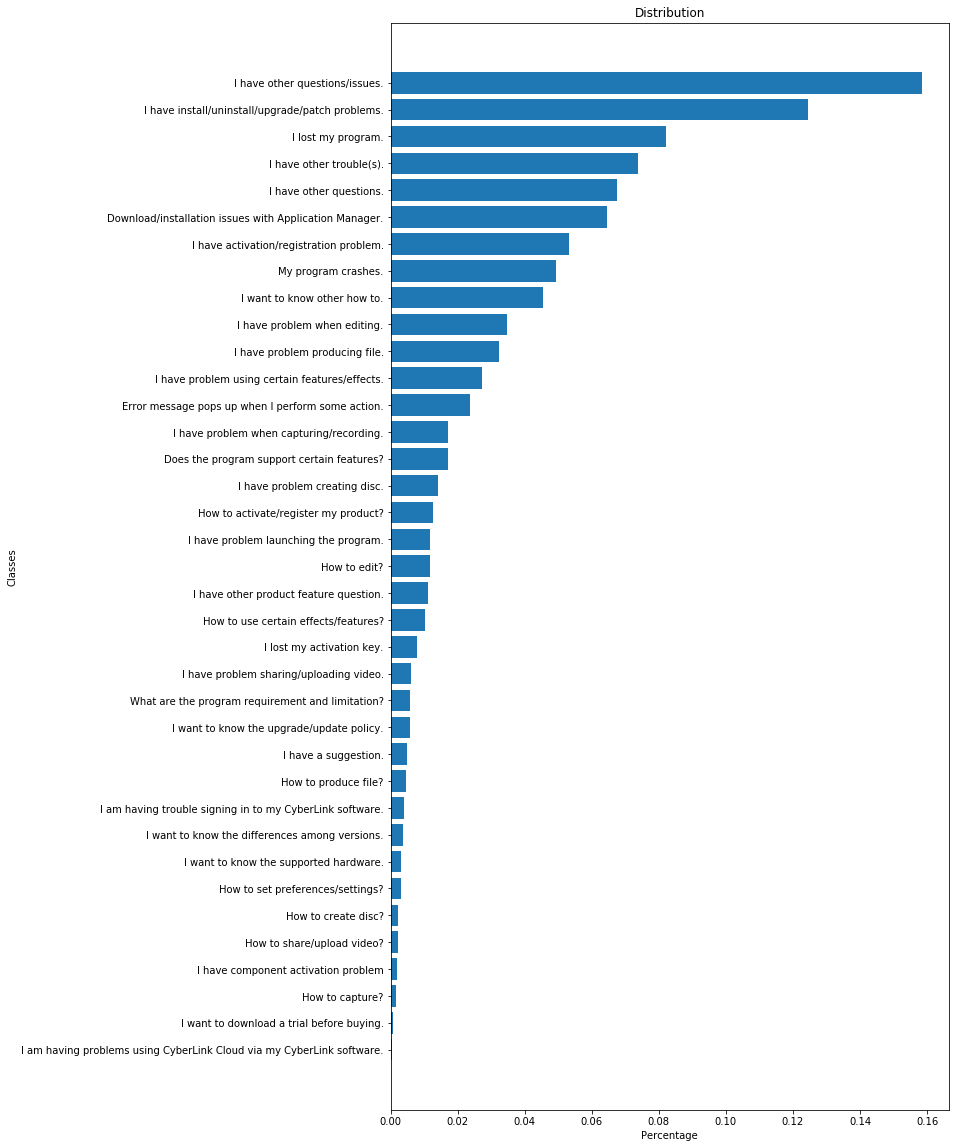

In [95]:
import matplotlib.pyplot as plt
x = [i for i in range(num_classes)]
fig, ax = plt.subplots( figsize=(10, 20))
ax.barh(x,stat)
ax.set_yticks(x)
ax.set_yticklabels(class_list)
ax.set_ylabel("Classes")
ax.set_xlabel("Percentage")
ax.set_title("Distribution")
plt.show()